In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# Code starts here

train = pd.read_csv('../data/train.csv')
train.head()

# Code ends here.

,Id,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,1182,25,0,30.30,0,0,3,2632.9920,1
1,990,26,0,19.80,1,0,3,3378.9100,0
2,123,44,1,31.35,1,1,0,39556.4945,1
3,184,44,1,30.69,2,0,2,7731.4271,0
4,1167,29,0,24.60,2,0,3,4529.4770,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1070 non-null   int64  
 1   age             1070 non-null   int64  
 2   sex             1070 non-null   int64  
 3   bmi             1070 non-null   float64
 4   children        1070 non-null   int64  
 5   smoker          1070 non-null   int64  
 6   region          1070 non-null   int64  
 7   charges         1070 non-null   float64
 8   insuranceclaim  1070 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 75.4 KB


In [4]:
train.describe()

,Id,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,668.617757,39.030841,0.495327,30.490196,1.128037,0.203738,1.516822,13262.895208,0.568224
std,385.470930,13.951271,0.500212,6.109707,1.211675,0.402965,1.110035,12125.948212,0.495555
min,1.000000,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,333.250000,27.000000,0.000000,26.030000,0.000000,0.000000,1.000000,4651.971162,0.000000
50%,676.500000,39.000000,0.000000,30.140000,1.000000,0.000000,2.000000,9341.303300,1.000000
75%,1000.500000,51.000000,1.000000,34.320000,2.000000,0.000000,2.000000,17117.636460,1.000000
max,1337.000000,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [5]:
train.dtypes

Id                  int64
age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [6]:
train.drop('Id',axis=1,inplace=True)

### EDA & Data Preprocessing

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.

In [7]:
corr = train.corr()
print(corr)

                     age       sex       bmi  children    smoker    region  \
age             1.000000 -0.026319  0.091499  0.061800 -0.012933  0.006400   
sex            -0.026319  1.000000  0.047436  0.032628  0.074341  0.018674   
bmi             0.091499  0.047436  1.000000  0.033350  0.005660  0.158037   
children        0.061800  0.032628  0.033350  1.000000  0.021243  0.027956   
smoker         -0.012933  0.074341  0.005660  0.021243  1.000000  0.006970   
region          0.006400  0.018674  0.158037  0.027956  0.006970  1.000000   
charges         0.316429  0.057600  0.197609  0.088766  0.778644 -0.001329   
insuranceclaim  0.083923  0.022043  0.366515 -0.386124  0.342564  0.014917   

                 charges  insuranceclaim  
age             0.316429        0.083923  
sex             0.057600        0.022043  
bmi             0.197609        0.366515  
children        0.088766       -0.386124  
smoker          0.778644        0.342564  
region         -0.001329        0.01491

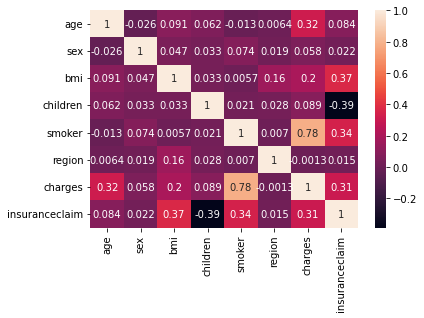

In [8]:
sns.heatmap(corr, annot = True)
plt.show()

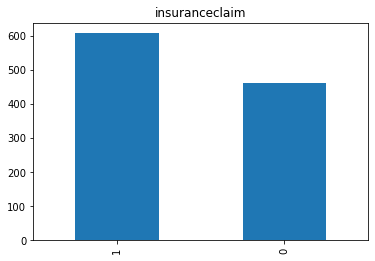

In [9]:
# Checking for the class distribution of the target
train['insuranceclaim'].value_counts().plot(kind='bar')
plt.title('insuranceclaim')
plt.show()

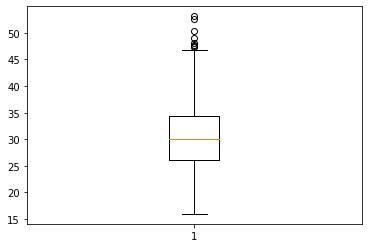

41.052249999999994


1    0.568224
0    0.431776
Name: insuranceclaim, dtype: float64

In [10]:
# Using boxpolt, check for Outliers. Plot the boxplot 

plt.boxplot(train['bmi'])

plt.show()
# set quantile (0.95)
q_value = train['bmi'].quantile(0.95)
print(q_value)

# Check the value counts of the target
train['insuranceclaim'].value_counts(normalize=True)

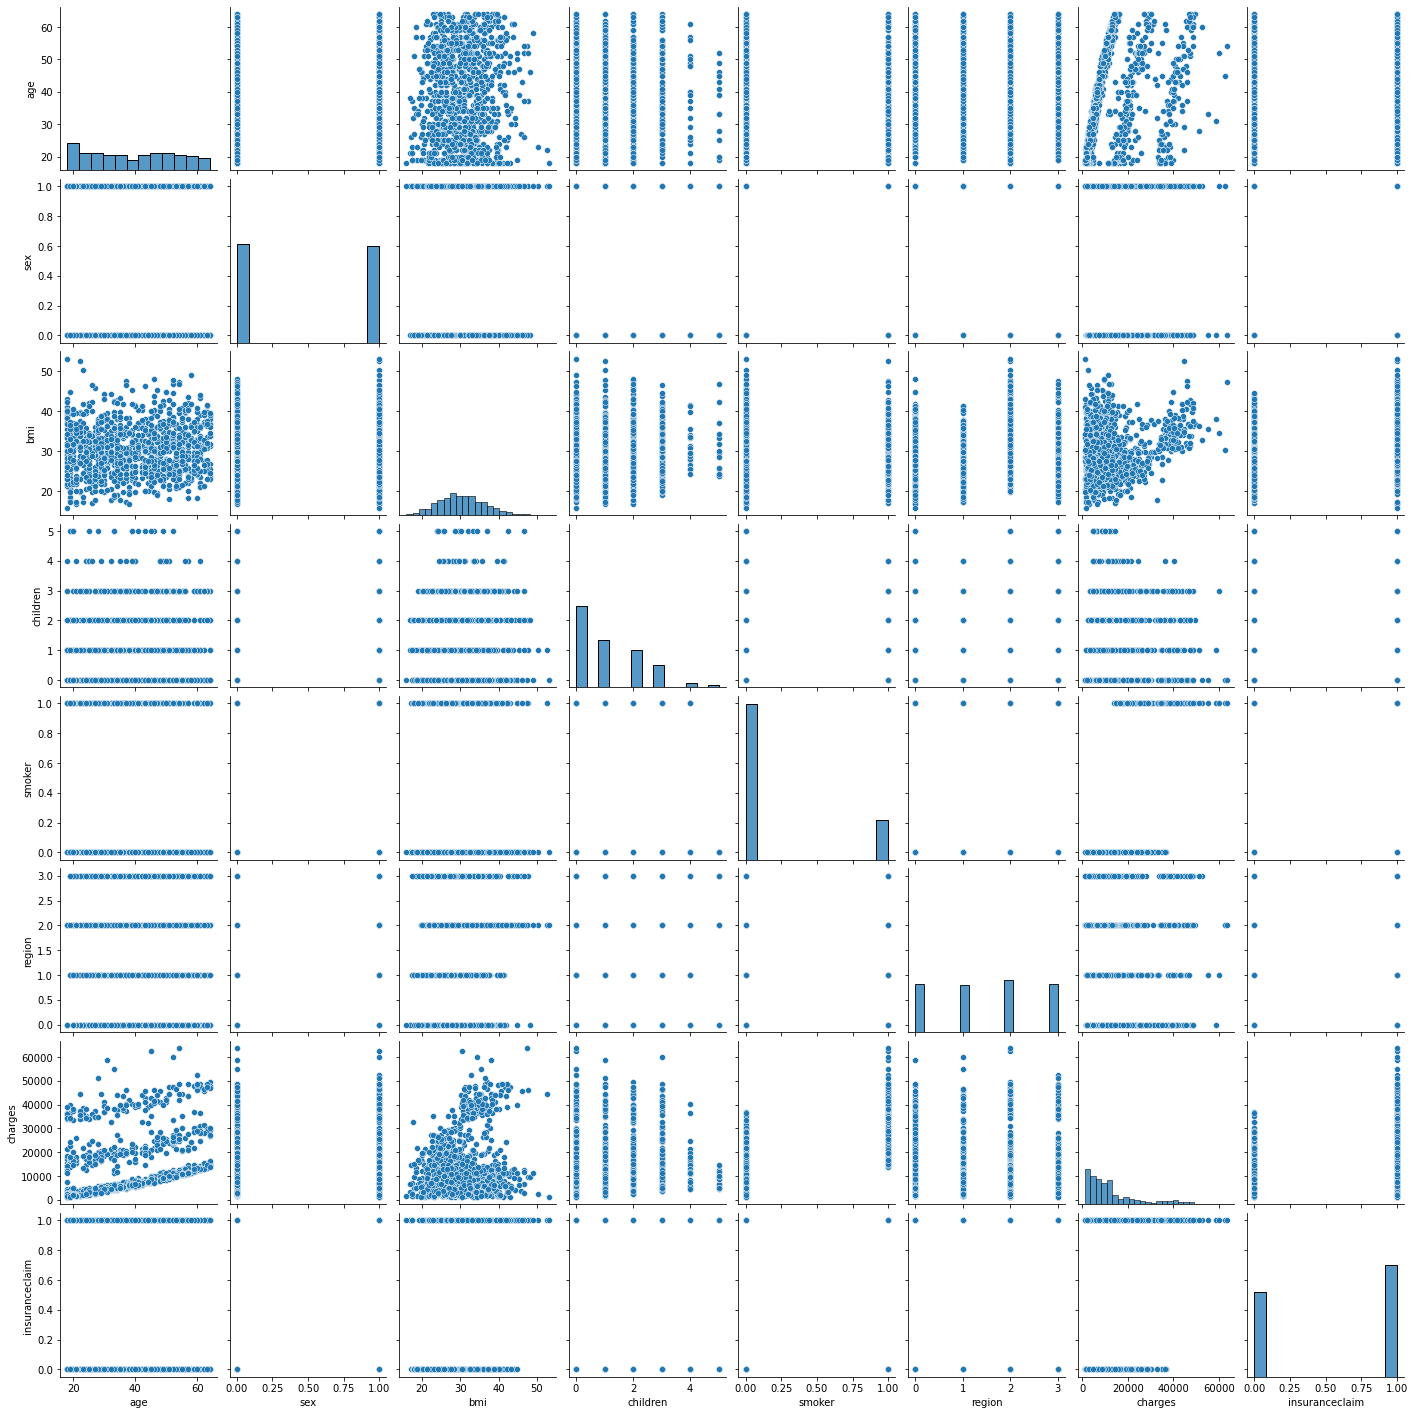

In [11]:
sns.pairplot(train)

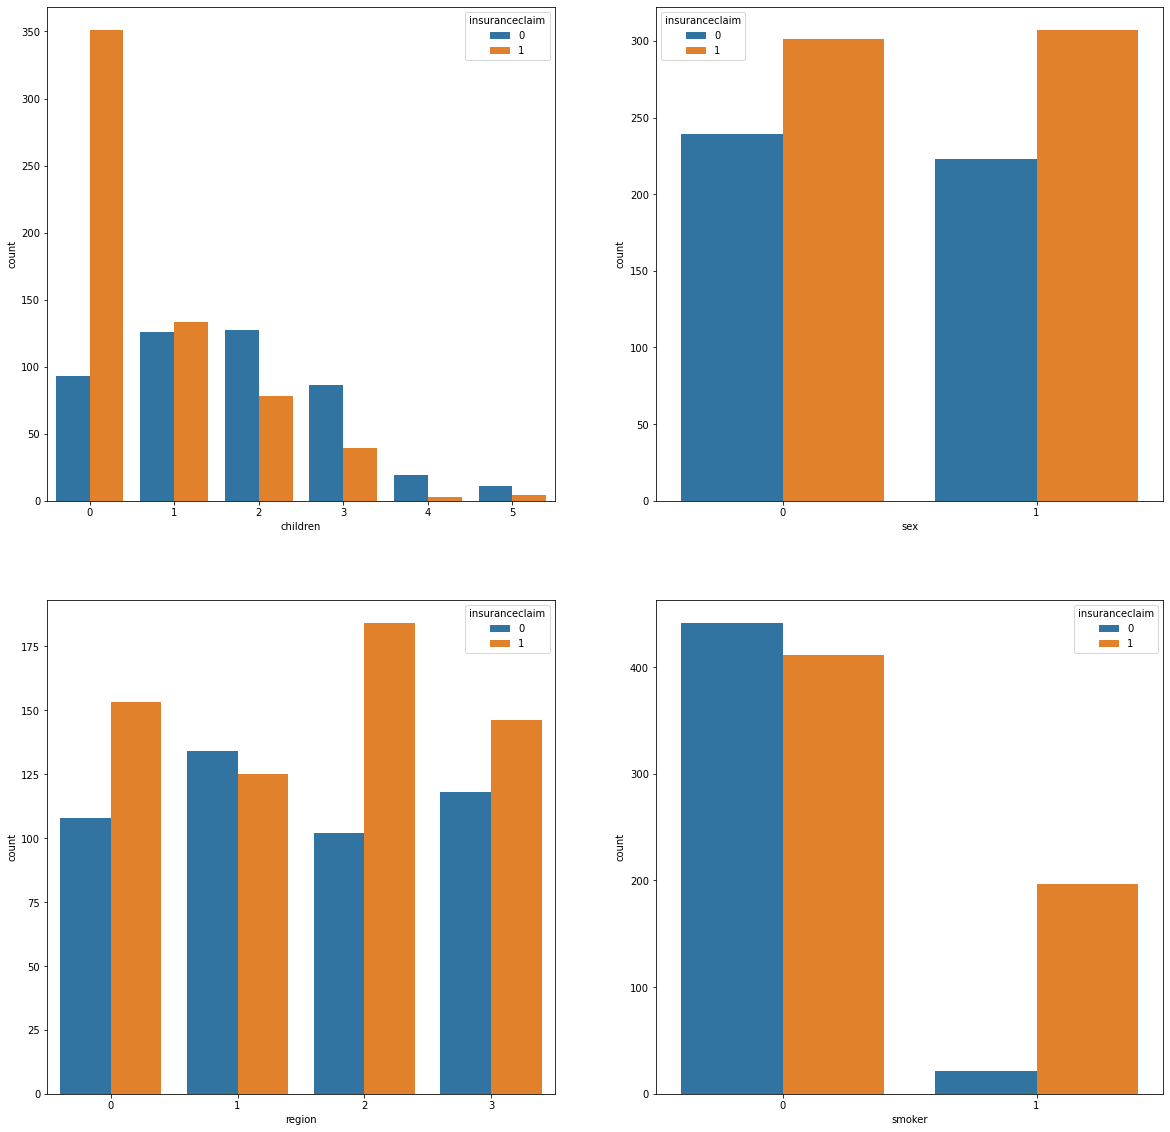

In [12]:
# store categorical variable
cols = ['children','sex','region','smoker']
        


# create subplot 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

# create loop for plotting countplot

for i in range(0,2):
    for j in range(0,2):
             col=cols[i*2 + j]
             sns.countplot(x=train[col], hue=train['insuranceclaim'], ax=axes[i,j])


### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using logistic regression, predict the insuranceclaim. Select the best model by cross-validation using Grid Search.
- Try improving upon the `roc_auc_score` using different parameters for Grid Search that give the best score.



In [13]:
# Code starts here

# store independent variable
X = train.drop('insuranceclaim',axis=1)

# store dependent variable
y = train['insuranceclaim']


X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state = 10)

# parameters for grid search
parameters = {'C':[0.1,0.5,1,5]}

# instantiate logistic regression model
lr=LogisticRegression(random_state=9)

# grid search on logistic regression
grid = GridSearchCV(estimator=lr, param_grid=parameters)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

acc = accuracy_score(y_test,y_pred)
print("Accuracy Score: ",acc)

roc_auc = roc_auc_score(y_test,y_pred)
print("ROC AUC Score: ",roc_auc)

# Code ends here.

Accuracy Score:  0.8006230529595015
ROC AUC Score:  0.7791723202170964


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [14]:
# # Code starts here

test = pd.read_csv('../data/test.csv')
test.drop(columns = ['Id'], axis = 1, inplace = True)

result = grid.predict(test)
result

# sample = pd.read_csv('sample_submission.csv')
# sample['insuranceclaim'] = result

# submission_data = sample.to_csv('submission.csv', index = False)
# Code ends here.


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0], dtype=int64)